# Auto-encoders and Generative models in `keras`

In this session, you will experiment with auto-encoders and then a family of generative models called 
Generative Adversarial Models (GANs).

## Auto-encoders

**Question 1.** Implement a shallow auto-encoder (with a single layer from the input to the hidden 
representation in dimension 16, and a single layer from this hidden representation to the output) and 
fit it to MNIST training set.



In [1]:
import keras_core as keras
from keras.datasets import mnist
from keras.layers import Dense, InputLayer
from keras.models import Sequential


(X_train, _), (X_test, _) = mnist.load_data()
# Represent images as long vectors of pixels in [0, 1]
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.
X_train = X_train[::2]  # Keep half of the dataset
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.
X_test = X_test[::2]  # Keep half of the dataset

model = Sequential([
    InputLayer(input_shape=(X_train.shape[1], )),
    Dense(units=16, activation="relu"),
    Dense(units=X_train.shape[1])
])
model.compile(loss="mse", optimizer="adam")
model.fit(X_train, X_train, epochs=10, batch_size=128)

Using TensorFlow backend


2023-07-18 14:54:21.635066: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-07-18 14:54:21.635092: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-07-18 14:54:21.635097: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-07-18 14:54:21.635136: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-18 14:54:21.635155: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-07-18 14:54:22.024726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 4ms/step - loss: 0.0620
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0454
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0395
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0371
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0357
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0352
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0350
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0349
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0348
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0347


**Question 2.** Use the code below to visualize the quality of reconstruction on some test samples.

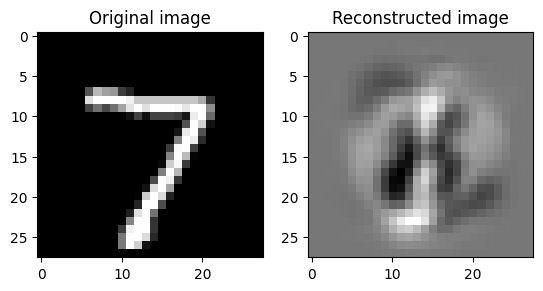

In [2]:
import matplotlib.pyplot as plt

def plot_reconstruction(img, reconstruction):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(img.reshape((28, 28)), cmap="gray")
    plt.title("Original image")
    plt.subplot(1, 2, 2)
    plt.imshow(reconstruction.reshape((28, 28)), cmap="gray")
    plt.title("Reconstructed image")

preds = model(X_test).numpy()
plot_reconstruction(X_test[0], preds[0])


**Question 3.** Check if adding more layers (in both the encoder and decoder, trying to keep a mirror 
structure) helps better reconstructing the images.

In [3]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1], )),
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=X_train.shape[1])
])
model.compile(loss="mse", optimizer="adam")
model.fit(X_train, X_train, epochs=20, batch_size=128)

Epoch 1/20
 11/235 [>.............................] - ETA: 1s - loss: 0.1147  

2023-07-18 14:54:31.601860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 5ms/step - loss: 0.0573
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0494
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0636
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0680
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1286
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1573
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1631
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1064
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1598
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2563
Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3201
Epoch 12/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3588
Epoch 13/20
235/235 [===============

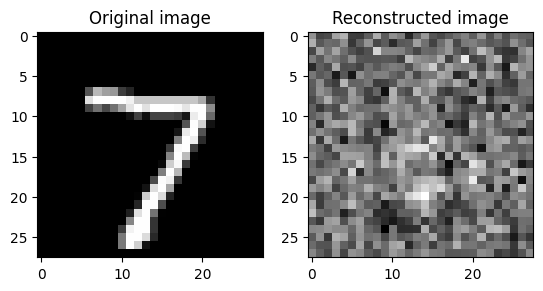

In [4]:
preds = model(X_test).numpy()
plot_reconstruction(X_test[0], preds[0])

Auto-encoders are known to be good image denoisers, if trained using noisy images as inputs and clean ones as outputs.

**Question 4.** Using the below-defined noisy copies of `X_train` and `X_test`, check the denoising 
capabilities of a network with the same structure as in the previous question.

In [5]:
import numpy as np

X_train_noisy = X_train + .1 * np.random.randn(*X_train.shape)
X_test_noisy = X_test + .1 * np.random.randn(*X_test.shape)

model = Sequential([
    InputLayer(input_shape=(X_train.shape[1], )),
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=X_train.shape[1])
])
model.compile(loss="mse", optimizer="adam")
model.fit(X_train_noisy, X_train, epochs=20, batch_size=128)

Epoch 1/20
 10/235 [>.............................] - ETA: 1s - loss: 0.1151 

2023-07-18 14:54:55.123741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 5ms/step - loss: 0.0540
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0391
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0471
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0863
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1411
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2579
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3415
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.6022
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.5603
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 1.1491
Epoch 11/20
235/235 [==============================] - 1s 5ms/step - loss: 0.6531
Epoch 12/20
235/235 [==============================] - 1s 5ms/step - loss: 1.3193
Epoch 13/20
235/235 [===============

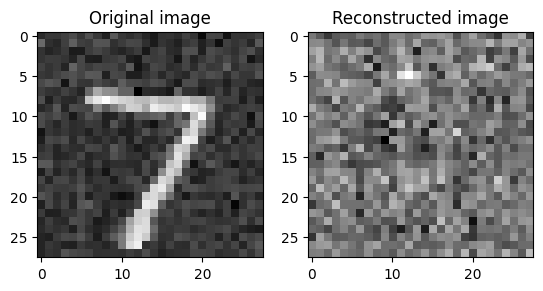

In [6]:
preds = model(X_test_noisy).numpy()
plot_reconstruction(X_test_noisy[0], preds[0])

## Generative Adversarial Networks (GAN)

In this section, you will be invited to play with two types of GAN models to generate MNIST-like data.

First, you will find below an almost complete implementation of the original GAN model (widely inspired from <https://github.com/eriklindernoren/Keras-GAN>).

**Question 5.** Fill in the blanks (TODO marks in the `train` method) to complete the code and train a model on MNIST for 1000 epochs.

In [7]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, ZeroPadding2D, LeakyReLU
from keras.layers import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import numpy as np

class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.randn(batch_size, self.latent_dim)
            
            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)  # TODO: change None to a reasonable value
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)  # TODO: change None to a reasonable value
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.randn(batch_size, self.latent_dim)  # TODO: change None to a reasonable value

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)  # TODO: change None to a reasonable value

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

gan = GAN()
gan.train(epochs=10 * 1000)


4/4 [==============================] - 0s 2ms/step


2023-07-18 14:55:18.666069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 14:55:18.996829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 14:55:20.117763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0 [D loss: 0.638039, acc.: 46.88%] [G loss: 0.500256]
4/4 [==============================] - 0s 2ms/step
1 [D loss: 0.397022, acc.: 60.94%] [G loss: 0.511472]
4/4 [==============================] - 0s 2ms/step
2 [D loss: 0.371694, acc.: 68.75%] [G loss: 0.532060]
4/4 [==============================] - 0s 2ms/step
3 [D loss: 0.370364, acc.: 69.53%] [G loss: 0.587472]
4/4 [==============================] - 0s 2ms/step
4 [D loss: 0.360254, acc.: 70.70%] [G loss: 0.667040]
4/4 [==============================] - 0s 2ms/step
5 [D loss: 0.316883, acc.: 87.89%] [G loss: 0.759583]
4/4 [==============================] - 0s 2ms/step
6 [D loss: 0.286613, acc.: 94.53%] [G loss: 0.910208]
4/4 [==============================] - 0s 2ms/step
7 [D loss: 0.260629, acc.: 97.27%] [G loss: 1.007518]
4/4 [==============================] - 0s 2ms/step
8 [D loss: 0.221718, acc.: 100.00%] [G loss: 1.174353]
4/4 [==============================] - 0s 2ms/step
9 [D loss: 0.192069, acc.: 99.22%] [G loss: 1.310739]


Now that your model is trained, generate a few images and visualize them with the code below:

1/1 [==============================] - 0s 188ms/step


2023-07-18 15:06:30.507395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


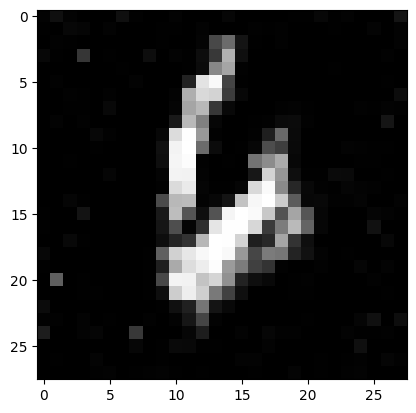

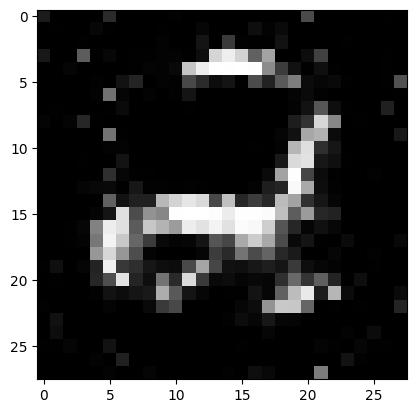

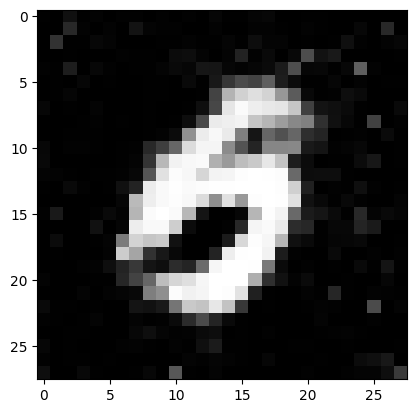

In [8]:
import matplotlib.pyplot as plt

n_images = 3
z = np.random.randn(n_images, gan.latent_dim)  # TODO: change None to a reasonable value
gen_imgs = gan.generator.predict(z)

# Rescale images 0 - 1
gen_imgs = 0.5 * gen_imgs + 0.5
for i in range(n_images):
  plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
  plt.show()

Code for a Conditional GAN is quite similar (_cf._ below, once again widely inspired from the same GitHub repository).

**Question 6.** What is the input fed to the generator to generate a fake sample?

In [9]:
from keras.layers import Multiply, Embedding


class CGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 10
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])

        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = Multiply()([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Dense(512, input_dim=np.prod(self.img_shape)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')

        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        flat_img = Flatten()(img)

        model_input = Multiply()([flat_img, label_embedding])

        validity = model(model_input)

        return Model([img, label], validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, y_train), (_, _) = mnist.load_data()

        # Configure input
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)
        y_train = y_train.reshape(-1, 1)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]

            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels])

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Condition on labels
            sampled_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            
cgan = CGAN()
cgan.train(epochs=1000)

4/4 [==============================] - 0s 3ms/step


2023-07-18 15:06:31.274005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:06:31.565781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-18 15:06:32.326609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0 [D loss: 0.692438, acc.: 31.64%] [G loss: 0.676636]
4/4 [==============================] - 0s 2ms/step
1 [D loss: 0.681845, acc.: 50.00%] [G loss: 0.670370]
4/4 [==============================] - 0s 2ms/step
2 [D loss: 0.674523, acc.: 50.00%] [G loss: 0.660941]
4/4 [==============================] - 0s 2ms/step
3 [D loss: 0.665533, acc.: 50.00%] [G loss: 0.652873]
4/4 [==============================] - 0s 2ms/step
4 [D loss: 0.656529, acc.: 50.00%] [G loss: 0.645720]
4/4 [==============================] - 0s 2ms/step
5 [D loss: 0.646288, acc.: 50.00%] [G loss: 0.634501]
4/4 [==============================] - 0s 2ms/step
6 [D loss: 0.632081, acc.: 50.00%] [G loss: 0.626135]
4/4 [==============================] - 0s 2ms/step
7 [D loss: 0.616390, acc.: 50.00%] [G loss: 0.616579]
4/4 [==============================] - 0s 2ms/step
8 [D loss: 0.596429, acc.: 50.00%] [G loss: 0.603617]
4/4 [==============================] - 0s 2ms/step
9 [D loss: 0.574030, acc.: 50.00%] [G loss: 0.589065]
4

**Question 7.** Fit the model for 1000 epochs and, once fitted, generate a few fake "8" handwritten digits (take inspiration from the code above to show the generated images).

2023-07-18 15:09:40.200466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 392ms/step


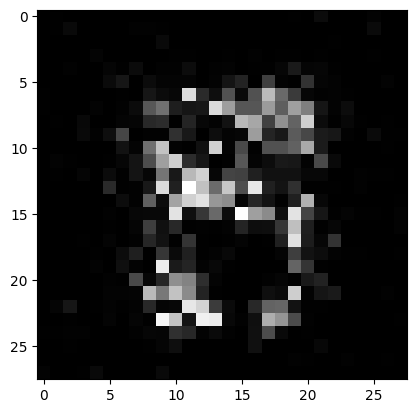

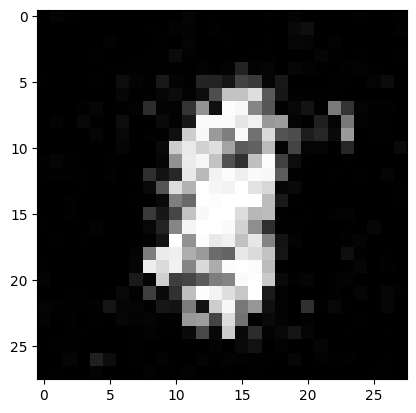

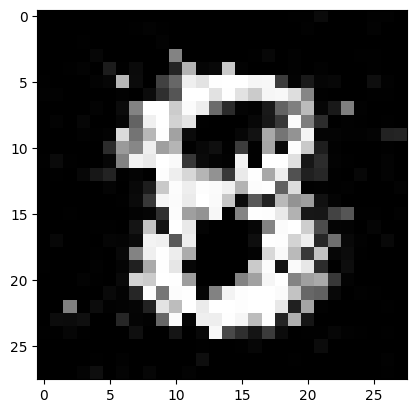

In [10]:
from keras.utils import to_categorical
n_images = 3
z = np.random.randn(n_images, cgan.latent_dim)  # TODO: change None to a reasonable value
labels = np.array([8, 8, 8])
gen_imgs = cgan.generator.predict([z, labels])

# Rescale images 0 - 1
gen_imgs = 0.5 * gen_imgs + 0.5
for i in range(n_images):
  plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
  plt.show()